Осуществим предобработку данных с Твиттера, чтобы отчищенный данные в дальнейшем использовать для задачи классификации. Данный датасет содержит негативные (label = 1) и нейтральные (label = 0) высказывания.
Для работы объединим train_df и test_df.

Задания:

1) Заменим html-сущности (к примеру: &lt; &gt; &amp;). "&lt;" заменим на “<” и "&amp;" заменим на “&”)""". Сделаем это с помощью HTMLParser.unescape(). Всю предобработку делаем в новом столбце 'clean_tweet'

2) Удалим @user из всех твитов с помощью паттерна "@[\w]*". Для этого создадим функцию: 
 - для того, чтобы найти все вхождения паттерна в тексте, необходимо использовать re.findall(pattern, input_txt)
 - для для замены @user на пробел, необходимо использовать re.sub()
при применении функции необходимо использовать np.vectorize(function).

3) Изменим регистр твитов на нижний с помощью .lower().

4) Заменим сокращения с апострофами (пример: ain't, can't) на пробел, используя apostrophe_dict. Для этого необходимо сделать функцию: для каждого слова в тексте проверить (for word in text.split()), если слово есть в словаре apostrophe_dict в качестве ключа (сокращенного слова), то заменить ключ на значение (полную версию слова).

5) Заменим сокращения на их полные формы, используя short_word_dict. Для этого воспользуемся функцией, используемой в предыдущем пункте.

6) Заменим эмотиконы (пример: ":)" = "happy") на пробелы, используя emoticon_dict. Для этого воспользуемся функцией, используемой в предыдущем пункте.

7) Заменим пунктуацию на пробелы, используя re.sub() и паттерн r'[^\w\s]'.

8) Заменим спец. символы на пробелы, используя re.sub() и паттерн r'[^a-zA-Z0-9]'.

9) Заменим числа на пробелы, используя re.sub() и паттерн r'[^a-zA-Z]'.

10) Удалим из текста слова длиной в 1 символ, используя ' '.join([w for w in x.split() if len(w)>1]).

11) Поделим твиты на токены с помощью nltk.tokenize.word_tokenize, создав новый столбец 'tweet_token'.

12) Удалим стоп-слова из токенов, используя nltk.corpus.stopwords. Создадим столбец 'tweet_token_filtered' без стоп-слов.

13) Применим стемминг к токенам с помощью nltk.stem.PorterStemmer. Создадим столбец 'tweet_stemmed' после применения стемминга.

14) Применим лемматизацию к токенам с помощью nltk.stem.wordnet.WordNetLemmatizer. Создадим столбец 'tweet_lemmatized' после применения лемматизации.

15) Сохраним результат предобработки в pickle-файл.

In [1]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}



short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}


emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os

import html.parser    

pd.set_option('display.max_colwidth', -1)

# Для ДЗ2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# train_df = pd.read_csv('train_tweets.csv')
# train_df.head()

In [4]:
# test_df = pd.read_csv('test_tweets.csv')
# test_df.head()

In [5]:
# combine_df = train_df.append(test_df, ignore_index = True, sort = False)
# combine_df.head()

In [6]:
# print(combine_df.info())

## ДЗ

In [7]:
class preprocessing:

    def __init__(self, **param):
        if 'file_name' in param:
            self.file_name = param['file_name']
            if self.file_name != '':
                self.df_load = pd.read_csv(self.file_name)
            self.df = ''
        else:
            return
        
    
    def _replace(self, text, dictonary, patern):
        results = re.findall(patern, text)
        for item in results:
            word = dictonary.get(item)
            if word != None:
                text = re.sub(item, word, text)
        return text

    def get_patern_emoji(self):
        simbol = ['[', '\\', '^', '$', '.', '|', '?', '*', '+', '(', ')']

        def __replace(s):
            new = ''
            for item in s:
                if item in simbol:
                    new += f'\{item}'
                else:
                    new += item
            return new

        return '|'.join([f'({__replace(x)})' for x in emoticon_dict])
    
    def preproces(self):

        df = self.df_load.copy()

        df['tweet'] = df['tweet'].astype('str') 
 
        # 1. Заменим html-сущности (к примеру: &lt; &gt; &amp;). "&lt;" заменим на “<” и "&amp;" заменим на “&”)""". Сделаем это с помощью HTMLParser.unescape()

        df['clean_tweet'] = html.parser.HTMLParser().unescape(df['tweet'])


        # 2. Удалим @user из всех твитов с помощью паттерна "@[\w]*". Для этого создадим функцию: 
        #  - для того, чтобы найти все вхождения паттерна в тексте, необходимо использовать re.findall(pattern, input_txt)
        #  - для для замены @user на пробел, необходимо использовать re.sub()
        # при применении функции необходимо использовать np.vectorize(function)


        df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub('@[\w]*','', x))

        # 3. Изменим регистр твитов на нижний с помощью .lower()

        df['clean_tweet'] = df['clean_tweet'].str.lower()

        # 4. Заменим сокращения с апострофами (пример: ain't, can't) на пробел, используя apostrophe_dict. 
        # Для этого необходимо сделать функцию: для каждого слова в тексте проверить (for word in text.split()), 
        # если слово есть в словаре apostrophe_dict в качестве ключа (сокращенного слова), 
        # то заменить ключ на значение (полную версию слова).

        df['clean_tweet'] = df['clean_tweet'].apply(lambda x: self._replace(x, apostrophe_dict, "[\w]*'[\w]*"))

        # 5. Заменим сокращения на их полные формы, используя short_word_dict. 
        # Для этого воспользуемся функцией, используемой в предыдущем пункте.

        df['clean_tweet'] = df['clean_tweet'].apply(lambda x: self._replace(x, short_word_dict, "[ ]"))

        # 6. Заменим эмотиконы (пример: ":)" = "happy") на пробелы, используя emoticon_dict. 
        # Для этого воспользуемся функцией, используемой в предыдущем пункте.
        patern = self.get_patern_emoji()
        df['clean_tweet'] = df['clean_tweet'].apply(lambda x: self._replace(x, emoticon_dict,patern))
        #'|'.join(['('+x+')' for x in emoticon_dict])

        # 7. Заменим пунктуацию на пробелы, используя re.sub() и паттерн r'[^\w\s]'

        df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ', x))

        # 8. Заменим спец. символы на пробелы, используя re.sub() и паттерн r'[^a-zA-Z0-9]'

        df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ', x))

        # 9. Заменим числа на пробелы, используя re.sub() и паттерн r'[^a-zA-Z]'

        df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ', x))

        # 10. Удалим из текста слова длиной в 1 символ, используя ' '.join([w for w in x.split() if len(w)>1])

        df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

        # 11. Поделим твиты на токены с помощью nltk.tokenize.word_tokenize, создав новый столбец 'tweet_token'.

        df['tweet_token'] = df['clean_tweet'].apply(lambda x: str(word_tokenize(x)))
        df['tweet_token'] = df['tweet_token'].astype('str') 

        # 12. Удалим стоп-слова из токенов, используя nltk.corpus.stopwords. 
        # Создадим столбец 'tweet_token_filtered' без стоп-слов.
        sw = set(stopwords.words("english"))
        df['tweet_token_filtered'] = df['tweet_token'].apply(lambda x: str(list(set(eval(x)).difference(sw))))
        # 

        # 13. Применим стемминг к токенам с помощью nltk.stem.PorterStemmer. 
        # Создадим столбец 'tweet_stemmed' после применения стемминга.

        porter = PorterStemmer()
        df['tweet_stemmed'] = df['tweet_token_filtered'].apply(lambda x: str([porter.stem(i) for i in eval(x)]))

        # 14. Применим лемматизацию к токенам с помощью nltk.stem.wordnet.WordNetLemmatizer. 
        # Создадим столбец 'tweet_lemmatized' после применения лемматизации.

        lemmatizer = WordNetLemmatizer()
        df['tweet_lemmatized'] = df['tweet_token_filtered'
                                   ].apply(lambda x: str([lemmatizer.lemmatize(i,wordnet.VERB
                                                                              ) for i in eval(x)]
                                                        )
                                          )
        self.df = df
    # 15. Сохраним результат предобработки в pickle-файл.        
    def _save(self, path = ''):
        self.df.to_pickle(f'{path}{self.file_name}.pkl')
        
    def _load(self, path = ''):
        self.df = pd.read_pickle(f'{path}')

Загружаем тренировочный файл

In [8]:
# pr = preprocessing(file_name = 'train_tweets.csv')
# pr.df_load.head()

In [9]:
# pr.preproces()
# pr._save()
# pr.df.head()

Загружаем тестовый файл

In [10]:
# pr = preprocessing(file_name = 'test_tweets.csv')
# pr.preproces()
# pr._save()
# pr.df.head()

## ДЗ2

In [12]:
pr = preprocessing(file_name = '')
pr._load('train_tweets.csv.pkl')

In [13]:
pr.df.head(5)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father is dysfunctional and is so selfish he drags his kids into his dysfunction run,"['when', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']","['kids', 'dysfunctional', 'father', 'run', 'drags', 'selfish', 'dysfunction']","['kid', 'dysfunct', 'father', 'run', 'drag', 'selfish', 'dysfunct']","['kid', 'dysfunctional', 'father', 'run', 'drag', 'selfish', 'dysfunction']"
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for lyft credit cannot use cause they do not offer wheelchair vans in pdx disapointed getthanked,"['thanks', 'for', 'lyft', 'credit', 'can', 'not', 'use', 'cause', 'they', 'do', 'not', 'offer', 'wheelchair', 'vans', 'in', 'pdx', 'disapointed', 'getthanked']","['credit', 'offer', 'cause', 'getthanked', 'pdx', 'thanks', 'use', 'vans', 'lyft', 'disapointed', 'wheelchair']","['credit', 'offer', 'caus', 'getthank', 'pdx', 'thank', 'use', 'van', 'lyft', 'disapoint', 'wheelchair']","['credit', 'offer', 'cause', 'getthanked', 'pdx', 'thank', 'use', 'vans', 'lyft', 'disapointed', 'wheelchair']"
2,3,0,bihday your majesty,bihday your majesty,"['bihday', 'your', 'majesty']","['majesty', 'bihday']","['majesti', 'bihday']","['majesty', 'bihday']"
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love take with all the time in ur,"['model', 'love', 'take', 'with', 'all', 'the', 'time', 'in', 'ur']","['ur', 'model', 'time', 'love', 'take']","['ur', 'model', 'time', 'love', 'take']","['ur', 'model', 'time', 'love', 'take']"
4,5,0,factsguide: society now #motivation,factsguide society now motivation,"['factsguide', 'society', 'now', 'motivation']","['factsguide', 'motivation', 'society']","['factsguid', 'motiv', 'societi']","['factsguide', 'motivation', 'society']"


In [14]:
docs_stemm = [ ' '.join(eval(item)) for item in pr.df['tweet_stemmed']]
docs_lemm = [ ' '.join(eval(item)) for item in pr.df['tweet_lemmatized']]

## 1. Создайте мешок слов с помощью CountVectorizer

In [15]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), analyzer='word', 
                                   binary=False, max_df =0.9,
                                   max_features = 1000, stop_words = 'english')
# ?CountVectorizer


bag_of_words = count_vectorizer.fit_transform(docs_stemm)

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
bag_of_words = count_vectorizer.fit_transform(docs_lemm)

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head()

,able,absolutely,accept,account,act,action,actor,actually,adapt,adapt gorilla,...,years,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Создайте мешок слов с помощью TfidfVectorizer

In [17]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                                   binary=False, max_df =0.9,
                                   max_features = 1000, stop_words = 'english')
values = tfidf_vectorizer.fit_transform(docs_stemm)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names).head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
values = tfidf_vectorizer.fit_transform(docs_lemm)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names).head()

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Натренируем gensim.models.Word2Vec модель на наших данных.


In [19]:
from gensim.models import Word2Vec, FastText
# ?Word2Vec

sentences = [ eval(item) for item in pr.df['tweet_token']]


In [20]:
%%time
modelW2V = Word2Vec(sentences=sentences, size=200, 
                    window=5, min_count=2, 
                    sg = 1, hs = 0, negative = 10, 
                    workers= 32, seed = 34)



modelW2V.train(sentences, total_examples=modelW2V.corpus_count,  epochs=20)

CPU times: user 2min 38s, sys: 1.8 s, total: 2min 39s
Wall time: 59.4 s


(5887358, 7633940)

## 4. Давайте немного потестируем нашу модель Word2Vec и посмотрим, как она работает. 

In [21]:
result = modelW2V.most_similar(positive=['dinner','woman'], 
                             negative=['man'])

print("{}: {:.4f}".format(*result[0]))

smark: 0.3961


## 5.Векторное представление любого слова

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# model.wv['father']
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
# tsne_plot(modelW2V)
# отключаем вывод всех векторов

вверху график по всем словам 
снизу по двум , по одному нельзя

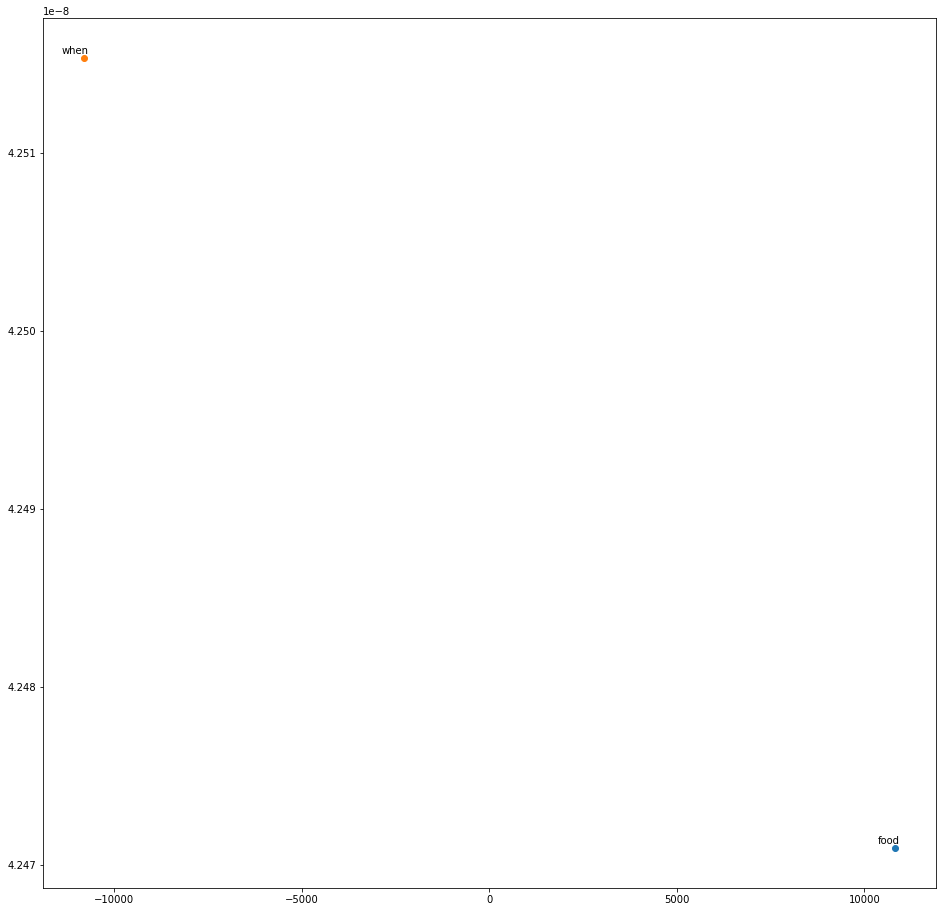

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# model.wv['father']
def tsne_plot(model, word = ''):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    if word == '':
        for word in model.wv.vocab:
            tokens.append(model[word])
            labels.append(word)
            break
    else:
        tokens.append(model[word])
        labels.append(word)
        #Эту штуку быстро добавил так как TNSE  не может по строить по одному слову((
        for word in model.wv.vocab:
            tokens.append(model[word])
            labels.append(word)
            break

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', 
                      n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(modelW2V, 'food')

## 6.
еще разок тренировал так как при min_count=2 много слов не не попало
возможно надо было сделать =2 и проверять на налицие слова в тренированной модели

In [24]:
%%time
modelW2V = Word2Vec(sentences=sentences, size=200, 
                    window=5, min_count=1, 
                    sg = 1, hs = 0, negative = 14, 
                    workers= 32, seed = 34)



modelW2V.train(sentences[0:4], total_examples=modelW2V.corpus_count,  epochs=20)


CPU times: user 1min 6s, sys: 1.16 s, total: 1min 8s
Wall time: 33.8 s


(741, 920)

In [25]:
def mean_vec(arr):
    size = 200
    vec = np.zeros(size).reshape((1, size))
    for item in arr:
        vec += modelW2V[item].reshape((1,size))
    vec /= len(arr)
    
    return vec[0]

In [26]:
pr.df['word2vec'] = pr.df['tweet_token'].apply(lambda x: mean_vec(eval(x)))
pr.df['word2vec'].head(2)

0    [0.12675848754588515, -0.21492624282836914, 0.30277396729798056, 0.09891721469466574, 0.10778598325123312, -0.3164694565348327, -0.11337236558028962, 0.17088233772665262, 0.2835478673223406, -0.052849772619083524, 0.14782714820466936, 0.2821359677473083, -0.03525865008123219, -0.3076208815909922, -0.055429533240385354, 0.12910804175771773, 0.08003462982014753, -0.06905915553215891, -0.04719847458181903, 0.2490918489638716, 0.07058689597761258, 0.12612755707232282, -0.1489028122741729, 0.12452065548859537, -0.07943184650503099, 0.036830844706855714, 0.2202228670939803, 0.11324335087556392, 0.07139556552283466, -0.031304537056712434, -0.04800085676833987, -0.008552674466045573, 0.1592418218497187, -0.18266525567742065, 0.1264963397406973, 0.10198631079401821, 0.05224935905425809, -0.3321501989848912, 0.2771488865837455, -0.30651155952364206, 0.29172918666154146, 0.254330568946898, -0.412583633325994, -0.1253032386302948, 0.31190725788474083, 0.25732387229800224, -0.03863191511482000

In [27]:
wordvec_df = np.array(pr.df['word2vec'].tolist())
wordvec_df.shape

(31962, 200)

## ДЗ 4

In [59]:
from sklearn import model_selection,linear_model, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.metrics import f1_score
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pandas, numpy#, textblob, string
#!pip install wordcloud
# 

In [92]:
class classification:
    
    def __init__(self, **param):
        self.df = ''
        self.X = ''
        self.y = ''
        
    def train_test_split(self, test_size=0.2):
        self.X_train, self.X_test, self.y_train, self.y_test = model_selection.train_test_split(
            self.X, self.y, test_size=test_size)
        
    def fit(self):
        self.model = linear_model.LogisticRegression()
        self.model.fit(self.X_train, self.y_train)
        
    def pred(self):
        self.y_pred = self.model.predict_proba(self.X_test)
        self.y_pred = [1 if item > 0.3 else 0  for item in self.y_pred[:, 1]]
    
    def f1_score(self, text = ''):
        fiscore = f1_score(self.y_test, self.y_pred)
        print(f'f1_score for {text} {round(fiscore*100, 0)}%')
        

## ДЗ 4.1

In [93]:
class1 = classification()
bag_of_words = count_vectorizer.fit_transform(docs_stemm)
feature_names = count_vectorizer.get_feature_names()

class1.X = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
class1.y = pr.df['label']
class1.train_test_split()
class1.fit()
class1.pred()
class1.f1_score('CountVectorizer stem')

f1_score for CountVectorizer stem 59.0%


In [94]:
class2 = classification()
bag_of_words = count_vectorizer.fit_transform(docs_lemm)
feature_names = count_vectorizer.get_feature_names()

class2.X = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
class2.y = pr.df['label']
class2.train_test_split()
class2.fit()
class2.pred()
class2.f1_score('CountVectorizer lemm')

f1_score for CountVectorizer lemm 53.0%


## ДЗ 4.2

In [95]:
class1 = classification()
bag_of_words = tfidf_vectorizer.fit_transform(docs_stemm)
feature_names = tfidf_vectorizer.get_feature_names()

class1.X = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
class1.y = pr.df['label']
class1.train_test_split()
class1.fit()
class1.pred()
class1.f1_score('Tfidf stemm')

f1_score for Tfidf stemm 57.0%


In [96]:
class1 = classification()
bag_of_words = tfidf_vectorizer.fit_transform(docs_lemm)
feature_names = tfidf_vectorizer.get_feature_names()

class1.X = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
class1.y = pr.df['label']
class1.train_test_split()
class1.fit()
class1.pred()
class1.f1_score('Tfidf lemm')

f1_score for Tfidf lemm 52.0%


## ДЗ 4.3

LogisticRegression в дефаултных настройках предстказывает лучше для мешка слов созданных CountVectorizer

## ДЗ 4.4-6

In [118]:
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class visualization:
    
    def __init__(self, **param):
        self.df = ''
        self.color = ''
        self.descr = ''
        
    def bild(self):
        words = []
        for line in self.df: 
            line_words = line.split()
            words.extend(line_words)

        wordfreq = collections.Counter(words)
        wordcloud = WordCloud(
        background_color=f'{self.color}',
#          mode = 'RGB',   
         max_words=2000,
         stopwords=stopwords
         ).generate_from_frequencies(wordfreq)
        print(f'{self.descr}')
        plt.figure(figsize=(10,9))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
     


all words


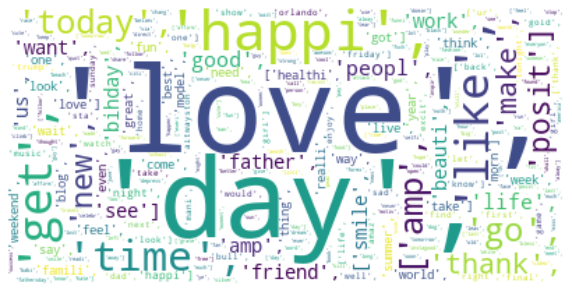

negative


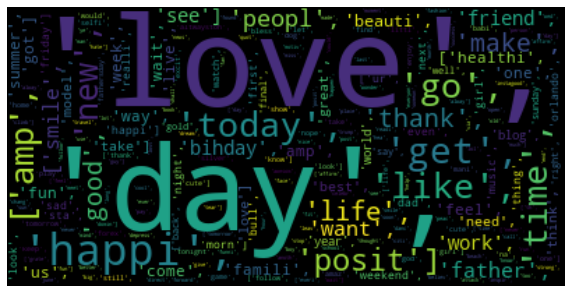

positive


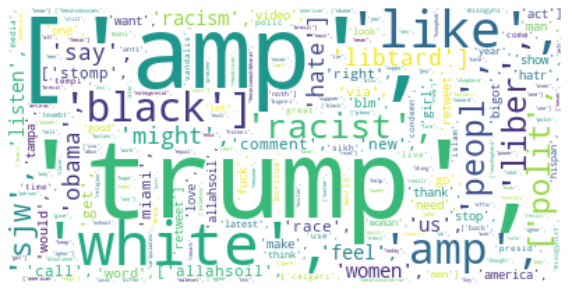

In [121]:
visio = visualization()
visio.df = pr.df['tweet_stemmed']
visio.color = 'white'
visio.descr = 'all words' 
visio.bild()
visio = visualization()
visio.df = pr.df['tweet_stemmed'][pr.df['label']==0]
visio.color = 'black'
visio.descr = 'negative' 
visio.bild()
visio = visualization()
visio.df = pr.df['tweet_stemmed'][pr.df['label']!=0]
visio.color = 'white'
visio.descr = 'positive' 
visio.bild()
# pr.df['tweet_stemmed']
# [pr.df['label']!=0]